## 3-8-1

In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

import seaborn as sns

In [2]:
##################################
#  独自ライブライー： LINE VIEW
# (複数の画像のグラフによる見比べ)
##################################
import cv2;import matplotlib.pyplot as plt;import matplotlib as mpl;from ipywidgets import interact
mpl.rcParams['figure.dpi'] = 140 # グラフで詳細まで見えるように
Imgs_For_Line_View = [] #global変数
Defalut_Y = 20 #global変数

## 使うときは、これを呼ぶ。(双方向バー表示のため、実態をラップ)
def lv( img1, img2=None, img3=None, img4=None, img5=None ):
    global Imgs_For_Line_View
    global Defalut_Y
    Imgs_For_Line_View =  list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5] ) )# Noneを削除
    Defalut_Y = Imgs_For_Line_View[0].shape[0] // 2 # Yの初期値。現状うまく動かず
    interact( lv_real, y = (0, Defalut_Y*2-1, 1) , fig_width=(0,5,0.05), fig_height=(0,5,0.05) ) # 双方向呼び出し

## lvの実体
def lv_real( fig_width=1, fig_height=1, y=Defalut_Y,  ):
    # 図を作成
    plt.figure(figsize=(4 * fig_width,4 * fig_height));plt.xticks(fontsize=4);plt.yticks(fontsize=4)
    # 画像ごとにグラフ線をplot
    for idx, tmp_img in enumerate( Imgs_For_Line_View):
        if  len(tmp_img.shape) >2 and tmp_img.shape[2] >1 : # RGBの３色残ってるときは、白黒に。
            tmp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h0, w0 = Imgs_For_Line_View[idx].shape[0], Imgs_For_Line_View[idx].shape[1] # 画像の高さ幅

        # 作図用にピクセルを参照
        tmp_pixel_list=[]
        for x in range(w0):
            pix = tmp_img[y, x]
            tmp_pixel_list.append(pix)
        plt.plot( tmp_pixel_list, label=idx, linewidth = 0.3 )

    plt.legend()
    plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def mplot(img, img2=None):

    img = img.astype(np.uint8)
    im4p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img2 is None:
        #     plt.subplot(121)
        plt.imshow(im4p)

    else:
        img2 = img2.astype(np.uint8)
        plt.subplot(121)
        plt.imshow(im4p)

        im4p2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.subplot(122)
        plt.imshow(im4p2)

In [4]:
def bulk_img( img, bulk_h, bulk_w):

    h, w =  img.shape

    dst = np.concatenate([img, np.zeros((bulk_h, w ))])
    dst = np.concatenate([dst, np.zeros((h+bulk_h, bulk_w ))], axis = 1)

    return (dst)


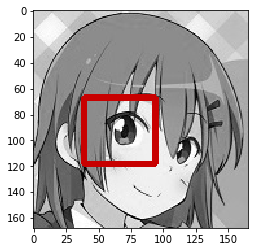

In [5]:

def main():
    img = cv2.imread("sample/3-8/input.png")
    
    
    temp = cv2.imread("sample/3-8/temp.png")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_SQDIFF)
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    pt = min_pt
    
    cv2.rectangle(img, (pt[0], pt[1]) , (pt[0] + w, pt[1] + h ), (0, 0, 200), 3)
    mplot(img)
#     mplot(temp)

main()

In [6]:
ls sample/3-8/

input.png   result.jpg    sample812.py  sample814.py  sample83.py  test.png
output.png  sample811.py  sample813.py  sample82.py   temp.png


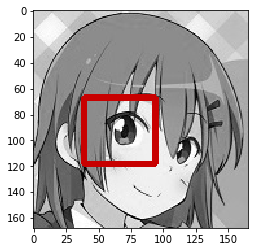

In [7]:
import cv2
import numpy as np


def main():
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)
    
    # 
    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_CCOEFF_NORMED)
    
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    
    pt = max_pt
    
    cv2.rectangle(img, (pt[0], pt[1]),  (pt[0] + w, pt[1] +h), (0, 0, 200), 3)
    mplot(img)
    
    
main()

## Numpy 版

In [8]:
%pdb off
import pixiedust

Automatic pdb calling has been turned OFF
Pixiedust database opened successfully


dx: 0 dy: 0
dx: 100 dy: 0
dx: 0 dy: 100
dx: 100 dy: 100


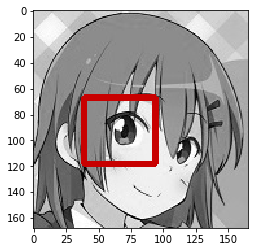

In [24]:
import cv2
import numpy as np


def template_matching_ssd(src, temp):

    h, w = src.shape
    ht, wt = temp.shape

    score = np.empty((h-ht, w-wt))

    for dy in range(0, h-ht):
        for dx in range(0, w-wt):
            diff = (src[dy:dy+ht, dx:dx+wt] - temp)**2

            score[dy, dx] = diff.sum()

            pt = np.unravel_index(score.argmin(), score.shape)
            
            
            if dy % 100 == 0 and dx % 100 ==0: print("n","dx:",dx,"dy:", dy)

    return (pt[1], pt[0], score)


def main():

    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape

    pt = template_matching_ssd(gray, temp)

    cv2.rectangle(img, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
    mplot(img)


main()

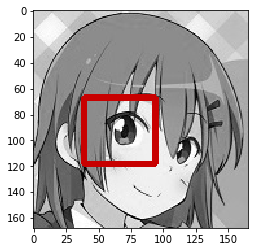

In [10]:
# %%pixie_debugger
import cv2
import numpy as np

score = None

def template_matching_zncc(src, temp):

    h, w = src.shape
    ht, wt = temp.shape

    global score
    score = np.empty((h-ht, w-wt))

    src = np.array(src, dtype="float")
    temp = np.array(temp, dtype="float")

    # テンプレート
    mu_t = np.mean(temp)

    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            roi = src[dy:dy + ht, dx:dx + wt]

            mu_r = np.mean(roi)

            roi = roi - mu_r

            tmp_temp = temp - mu_t

            num = np.sum(roi * tmp_temp)
            
            den = np.sqrt(np.sum(roi**2)) * np.sqrt(np.sum(tmp_temp**2))
            
            if den == 0:
                score[dy, dx] = 0
            else:
                score[dy, dx] = num / den
            
            
    pt = np.unravel_index(score.argmax(), score.shape)
    
    return (pt[1], pt[0])


def main() :
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    # テンプレートの画像の高さ・幅
    h, w = temp.shape
    
    pt = template_matching_zncc(gray, temp)
    
#     cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    
    mplot(img)

main()

In [11]:
lv(score)


interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

## ヒートマップ

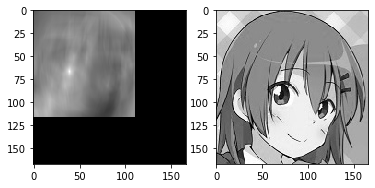

In [12]:
img = cv2.imread("sample/3-8/input.png")
temp = cv2.imread("sample/3-8/temp.png")
# score_256 = (score+1)*128

score_256 =  ((score+1)*128).astype(np.int)
score_256 = bulk_img(score_256, temp.shape[0], temp.shape[1] )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# gray_score = cv2.cvtColor(score_256, cv2.COLOR_RGB2GRAY)

mplot(score_256, img)


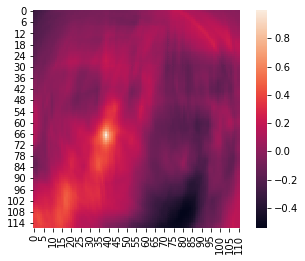

In [48]:
sns.heatmap(score, square = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


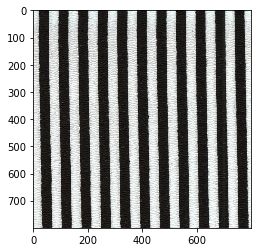

In [14]:
## デバッグ用画像簡易入手
import urllib.request ;import cv2; import matplotlib.pyplot as plt
img_url = 'https://tex-mall.jp/file/item/5a4356082008d/88f661d68f080129fb0e514b8834198f.jpg' # ここを好きに変える
img_shima = cv2.imdecode(np.fromstring(urllib.request.urlopen(img_url).read(), np.uint8), cv2.IMREAD_COLOR)

plt.imshow(img_shima)



dx: 0 dy: 0
dx: 100 dy: 0
dx: 200 dy: 0
dx: 300 dy: 0
dx: 400 dy: 0
dx: 500 dy: 0
dx: 600 dy: 0
dx: 0 dy: 100
dx: 100 dy: 100
dx: 200 dy: 100
dx: 300 dy: 100
dx: 400 dy: 100
dx: 500 dy: 100
dx: 600 dy: 100
dx: 0 dy: 200
dx: 100 dy: 200
dx: 200 dy: 200
dx: 300 dy: 200
dx: 400 dy: 200
dx: 500 dy: 200
dx: 600 dy: 200
dx: 0 dy: 300
dx: 100 dy: 300
dx: 200 dy: 300
dx: 300 dy: 300
dx: 400 dy: 300
dx: 500 dy: 300
dx: 600 dy: 300
dx: 0 dy: 400
dx: 100 dy: 400
dx: 200 dy: 400
dx: 300 dy: 400
dx: 400 dy: 400
dx: 500 dy: 400
dx: 600 dy: 400
dx: 0 dy: 500
dx: 100 dy: 500
dx: 200 dy: 500
dx: 300 dy: 500
dx: 400 dy: 500
dx: 500 dy: 500
dx: 600 dy: 500
dx: 0 dy: 600
dx: 100 dy: 600
dx: 200 dy: 600
dx: 300 dy: 600
dx: 400 dy: 600
dx: 500 dy: 600
dx: 600 dy: 600


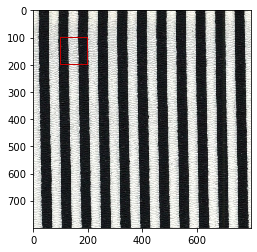

In [60]:
gray_shima = cv2.cvtColor(img_shima, cv2.COLOR_RGB2GRAY)
temp_shima = gray_shima[100:200,100:200]
# breakpoint()
h, w = temp_shima.shape
pt = template_matching_ssd(gray_shima, temp_shima)

score_shima = pt[2]
score_shima = bulk_img(score_shima, h, w)

cv2.rectangle(img_shima, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
mplot(img_shima)

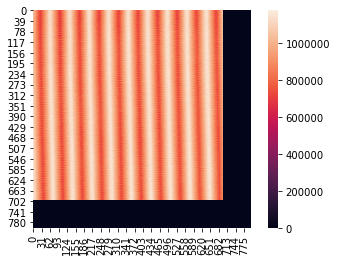

In [61]:
sns.heatmap(score_shima, square=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


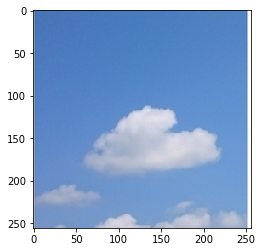

In [62]:
sky_url = "https://static.minne.com/profiles/2686518/large/589b58b41036956c04da78a4b06fce4c6173db7d.jpg"
img_sky = cv2.imdecode(np.fromstring(urllib.request.urlopen(sky_url).read(), np.uint8), cv2.IMREAD_COLOR)
mplot(img_sky)

dx: 0 dy: 0
dx: 100 dy: 0
dx: 0 dy: 100
dx: 100 dy: 100
dx: 0 dy: 200
dx: 100 dy: 200


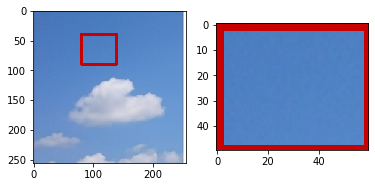

In [58]:
gray_sky = cv2.cvtColor(img_sky, cv2.COLOR_RGB2GRAY)
temp_sky_org = img_sky[40:90,80:140].copy()

temp_sky = cv2.cvtColor(temp_sky_org, cv2.COLOR_RGB2GRAY)
# temp_sky = gray_sky[40:90,80:140]
# breakpoint()
h, w = temp_sky.shape
pt_sky = template_matching_ssd(gray_sky, temp_sky)

score_sky = pt_sky[2]
score_sky = bulk_img(score_sky, h, w)

cv2.rectangle(img_sky, (pt_sky[0], pt_sky[1]), (pt_sky[0] + w, pt_sky[1] + h), (0, 0, 200), 3)
mplot(img_sky, temp_sky_org)

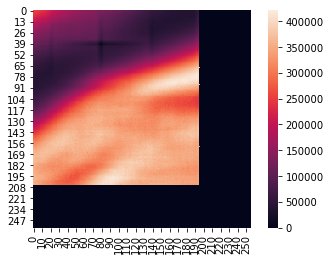

In [59]:
sns.heatmap(score_sky, square=True)

In [ ]:
mplot(sky_img)